# Understanding the '*' Operator in Python 🌟

In Python, the `*` it's often referred to as the "splat" operator or the "unpacking" operator, and it's used to handle multiple arguments or elements in a flexible way.

## The Single Star ('*') - Unpacking Sequences 🌌

When you see a single `*` before an iterable (like a list, tuple, or string), it unpacks the elements of that iterable.

For example, if you have a list `my_list = [1, 2, 3]`, you can use `*my_list` to unpack its elements:

```python
a, b, c = *my_list
```

Now, a will be 1, b will be 2, and c will be 3.

## The Double Star ('**') - Unpacking Dictionaries 📦
The ** operator works similarly for dictionaries. It unpacks key-value pairs in a dictionary.

Suppose you have a dictionary:
```python
my_dict = {'x': 42, 'y': 99}
```
you can use `**my_dict` to unpack its contents:

```python
def print_values(x, y):
    print(x, y)

print_values(**my_dict)
```

In [1]:
def sum_two_arguments(a,b):
  return a+b

x = 3,2
sum_two_arguments(*x)

5

In [2]:
# When you define a function parameter with `*args`, it tells Python to collect any additional positional arguments passed to the function and store them in a tuple called `args`.

def sum_all(*args):
    result = sum(args)
    return result

print("Three args:", sum_all(3,2,4))
print("Four args:", sum_all(3,2,4,5))


Three args: 9
Four args: 14


## Selecting Rows from a 2D Numpy Array Based on a Condition🔍

In Python, you can select specific rows from a 2D numpy array (X) based on a condition applied to a corresponding 1D numpy array (y). The code `X[y == 1, :]` accomlpishes this task.

This operation is known as **boolean indexing** in the context of `numpy` arrays.

In [3]:
import numpy as np

# Sample 2D numpy array X
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Sample 1D numpy array y with labels
y = np.array([0, 1, 1])

# Select rows from X where y is equal to 1
selected_rows = X[y == 1, :]

# Resulting selected_rows will contain rows where y == 1
print(selected_rows)


[[4 5 6]
 [7 8 9]]


# Generating Random Data with make_blobs 📊

In `scikit-learn`, the `make_blobs` function is a convenient tool for creating synthetic datasets for various machine learning tasks. This function generates random data points grouped into multiple clusters, making it useful for tasks like clustering and classification.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

n_samples = 5000

# Generate two blobs with those centers and two different classe
centers = [(-1, 0), (1, 0)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=2112)

# Train/Test set definition.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2112)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

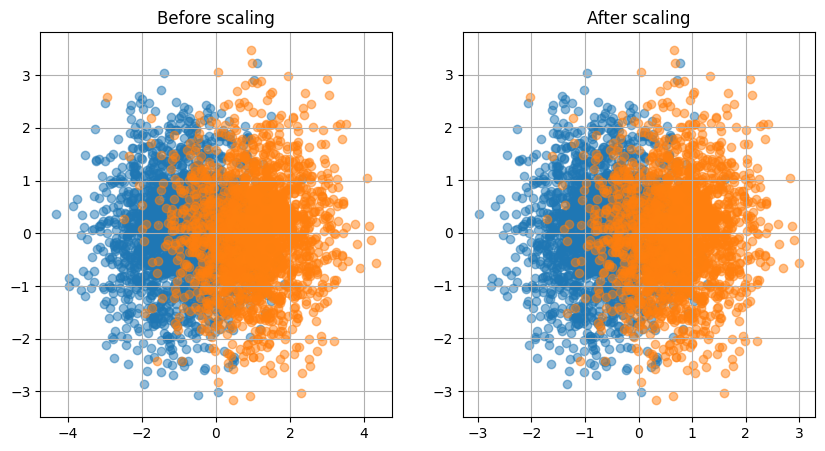

In [6]:
def get_xy(X_set, y_set, y_val):
  x = X_set[y_set == y_val, 0]
  y = X_set[y_set == y_val, 1]
  return x, y

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].scatter(*get_xy(X_train, y_train, 0), alpha = 0.5)
axs[0].scatter(*get_xy(X_train, y_train, 1), alpha = 0.5)
axs[0].set_title('Before scaling')
axs[0].grid()

axs[1].scatter(*get_xy(X_train_scaled, y_train, 0), alpha = 0.5)
axs[1].scatter(*get_xy(X_train_scaled, y_train, 1), alpha = 0.5)
axs[1].set_title('After scaling')
axs[1].grid()

fig.show()

Question:
- what changes you notice between the figures?
- can you explain such changes?

In [7]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_classifier = LogisticRegression()

# Train the model on the standardized data
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.85
Confusion Matrix:
 [[521 104]
 [ 89 536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       625
           1       0.84      0.86      0.85       625

    accuracy                           0.85      1250
   macro avg       0.85      0.85      0.85      1250
weighted avg       0.85      0.85      0.85      1250

ROC AUC: 0.92
Average Precision: 0.92


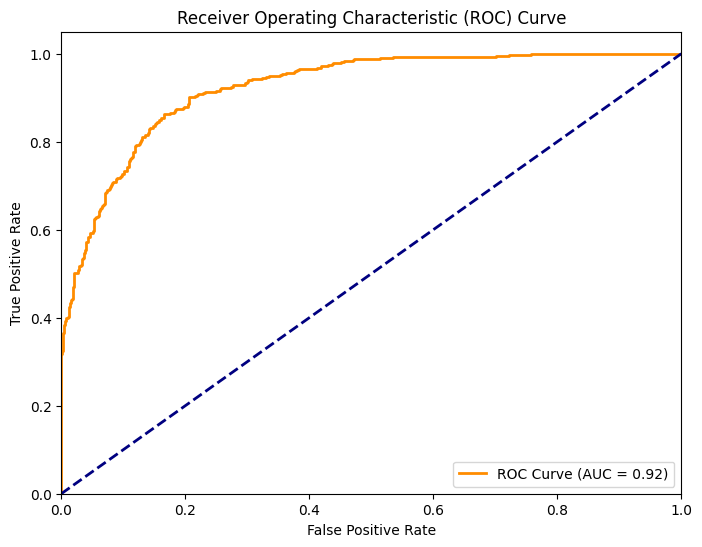

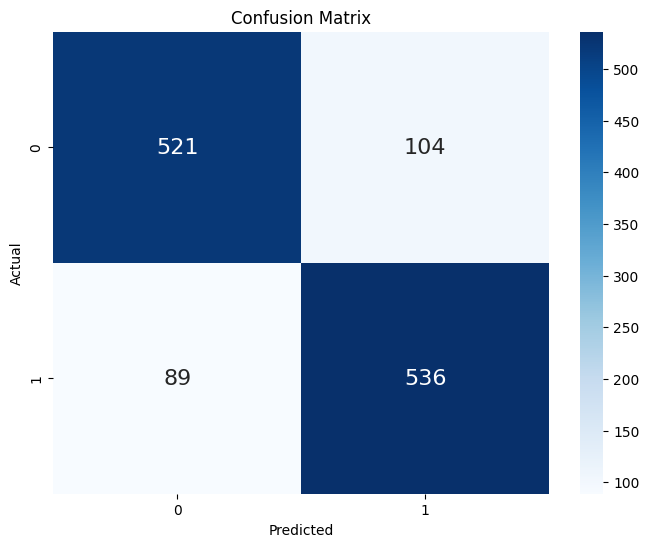

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = logistic_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create a logistic regression model
knn_classifier = KNeighborsClassifier()

# Train the model on the standardized data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 0.81
Confusion Matrix:
 [[521 104]
 [135 490]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       625
           1       0.82      0.78      0.80       625

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250

ROC AUC: 0.92
Average Precision: 0.92


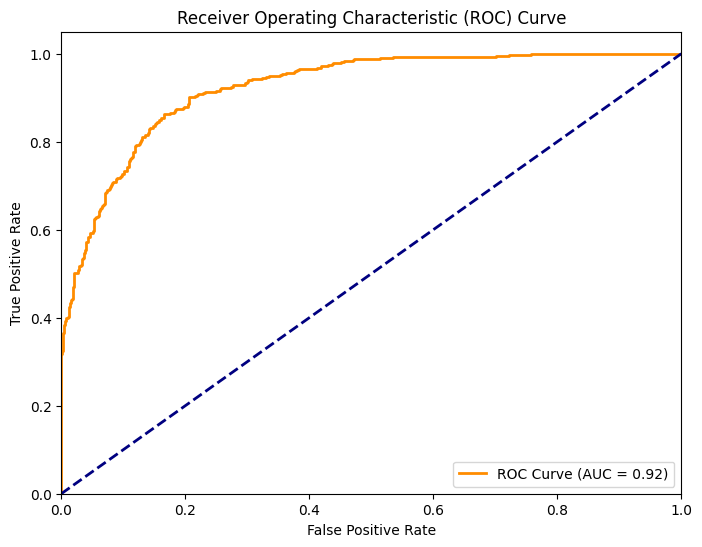

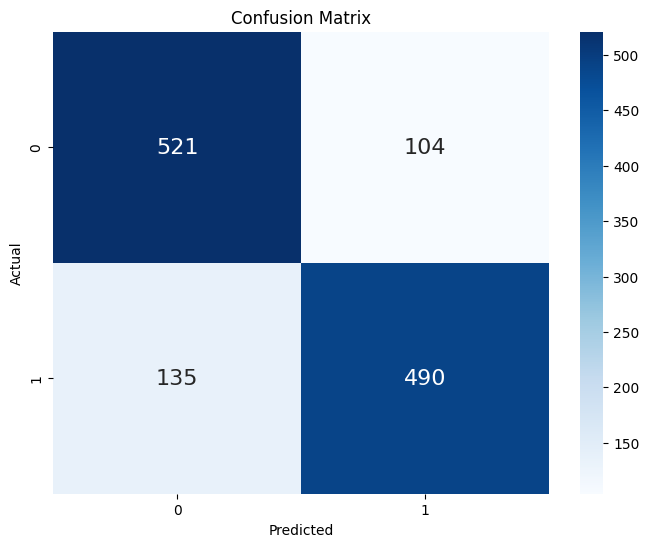

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = logistic_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Cross validation
An important part of the model validation process is to make sure that we pick the right hyperparameters (in the case of KNN the **weights** and the **number of neighbors**).

But:
- how should we pick the right value?
- how do we make sure there is no overfitting after choosing the right value that evaluates the best performance on the test set?

The solution is the K-fold Cross Validation:

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

For each split we'll try a different combination of HPs.

In [11]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

centers = [(-1,0), (1,0)]
X, y = make_blobs(centers = centers, n_samples=500, n_features = 2, random_state = 2112)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2112)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': [8,9,10,11,12,13,14], 'weights': ['uniform', 'distance']}, scoring='roc_auc', cv = 5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [8, 9, 10, 11, 12, 13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [12]:
import pandas as pd
results = clf.cv_results_

results_df = pd.DataFrame(results).sort_values(by = 'rank_test_score')

In [13]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.000486,0.000048,0.001680,0.000303,14,uniform,"{'n_neighbors': 14, 'weights': 'uniform'}",0.884068,0.858108,0.866809,0.940171,0.926282,0.895088,0.032540,1
10,0.000430,0.000003,0.001389,0.000031,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",0.888336,0.854908,0.854345,0.932692,0.937322,0.893520,0.036071,2
8,0.000452,0.000028,0.001387,0.000030,12,uniform,"{'n_neighbors': 12, 'weights': 'uniform'}",0.878734,0.853841,0.860755,0.933048,0.932336,0.891743,0.034409,3
13,0.000456,0.000014,0.001433,0.000054,14,distance,"{'n_neighbors': 14, 'weights': 'distance'}",0.886202,0.858108,0.857906,0.945157,0.904558,0.890386,0.032604,4
2,0.000439,0.000006,0.001344,0.000017,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.877667,0.849573,0.867877,0.925214,0.922721,0.888610,0.030255,5


Questions:
- If n_neighbors increases, the roc_auc score increases? Try to explain why.
- Is there noticeable difference between the weights?